In [1]:
import pandas as pd
import os

workers = [1,2,4,8,12,16,20,24,28,32]
data_path = os.path.join(os.path.pardir, 'data')

dfs = []
for worker in workers:
    d = []
    data = pd.read_csv(os.path.join(data_path, 'baseline', 'daint_mc', 'faas_applications', 'blackscholes', f'blackscholes_omp_{worker}'))
    data['worker'] = worker
    data = data.iloc[1:] 
    dfs.append(data)
df = pd.concat(dfs, axis=0)
df['type'] = 'omp'


dfs = []
for worker in workers:
    d = []
    data = pd.read_csv(os.path.join(data_path, 'faas_applications', 'blackscholes', 'rfaas_100', f'rfaas_{worker}'))
    data['worker'] = worker
    dfs.append(data)
df_f = pd.concat(dfs, axis=0)
df_f['type'] = 'rfaas_100'

dfs = []
for worker in workers:
    d = []
    data = pd.read_csv(os.path.join(data_path,  'faas_applications', 'blackscholes', 'rfaas_50', f'rfaas_{worker}'))
    data['worker'] = worker
    dfs.append(data)
df_f2 = pd.concat(dfs, axis=0)
df_f2['type'] = 'rfaas_50'

data = pd.concat([df, df_f, df_f2])
data['time'] = data['repetition']
# convert to seconds
data['time'] /= 1000.0

print(df.groupby(['worker']).mean())
print(df_f.groupby(['worker']).mean())
print(df_f2.groupby(['worker']).mean())

SERIAL = 726245 / 1000.0

data.reset_index(inplace=True)

#data_serial = pd.read_csv(os.path.join(data_path, 'blackscholes_serial.csv'))
#SERIAL = data_serial['repetition'].median()
#SERIAL /= 1000.0
print("Serial Black-Scholes execution", SERIAL)

           repetition
worker               
1       726245.050505
2       539037.737374
4       270771.131313
8       151396.848485
12      108202.929293
16       86912.671717
20       69607.643434
24       57900.222222
28       49706.798990
32       43430.673737
        repetition
worker            
1       644090.260
2       368693.980
4       201736.940
8       122702.210
12       91101.122
16       73847.220
20       64443.657
24       57762.819
28       53172.090
32       50094.359
        repetition
worker            
1       365993.280
2       196393.210
4        98162.506
8        61425.621
12       45342.368
16       37133.364
20       32346.284
24       29037.007
28       26822.515
32       25169.690
Serial Black-Scholes execution 726.245


/tmp/ipykernel_844818/801106784.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/801106784.py:60: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/801106784.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/801106784.py:67: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/801106784.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=x3['time'],
/tmp/ipykernel_844818/801106784.py:74: UserWarning: Ignoring `palette` because no `hue` variab

           index  repetition      time
worker                                
1       1.010101    1.128947  0.885781
2       1.010101    1.517505  0.658977
4       1.010101    1.342508  0.744874
8       1.010101    1.233710  0.810563
12      1.010101    1.187977  0.841767
16      1.010101    1.177208  0.849468
20      1.010101    1.080350  0.925626
24      1.010101    1.002540  0.997466
28      1.010101    0.934871  1.069666
32      1.010101    0.870594  1.148641
[<matplotlib.lines.Line2D object at 0x7fa53c287af0>, <matplotlib.lines.Line2D object at 0x7fa53c287370>, <matplotlib.lines.Line2D object at 0x7fa53c286890>] ['omp', 'rfaas_100', 'rfaas_50']


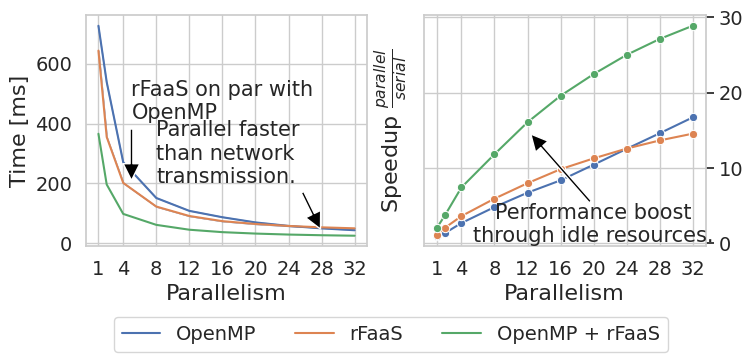

In [2]:
import pandas as pd


import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import math

#sns.set(rc={'figure.figsize':(8,4)})
sns.set(rc={'figure.figsize':(8,3)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

def bandwidth_function(x, p):
    # mebibytes/s
    #bw = 11464.333008
    bw = 11686.41
    # 2 - round-trip
    # x - number of workers
    # size - basic msg size
    return p*(size*size*24)/ (bw * 1024 * 1024) * 1000
xrange = list(range(200, 800))#[200,2,4,8,12,16,20,24,28,32,64]

omp  = data.loc[(data['type'] == 'omp')].groupby(['worker']).median()
elastic  = data.loc[(data['type'] == 'rfaas_100') ].groupby(['worker']).median()
#print(omp)
#print(elastic)
x = omp
x['time'] = SERIAL / x['time']
#x = (omp['time']/SERIAL)#.reset_index()
#x.set_index('worker', 
#print(x)
elastic2  = data.loc[(data['type'] == 'rfaas_50') ].groupby(['worker']).median()
x2 = elastic
x2['time']=  SERIAL /x2['time']#.reset_index()
#print(x2)
x3 = elastic2
x3['time'] = SERIAL / x3['time'] 

#print('omp/rfaas')
print(omp/elastic)


fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(hspace=3)
ax[0], ax[1] = ax[1], ax[0]

#print(x['time'])

sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
             ci=None, marker="o",
             estimator=p50_estimator,
             color=sns.color_palette()[0],
             palette=sns.color_palette()[0],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax[0])
sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
             ci=None, marker="o",
             estimator=p50_estimator,
             color=sns.color_palette()[1],
             palette=sns.color_palette()[1],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax[0])
sns.lineplot(data=x3['time'],
             ci=None, marker="o",
             estimator=p50_estimator,
             color=sns.color_palette()[2],
             palette=sns.color_palette()[2],
             #data=x2,
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax[0])
#d = data.loc[data['type'] == 'mpi']
#sns.lineplot(x="size", y="time", hue='workers', ci=None, estimator=p50_estimator,
#             palette=sns.color_palette()[0:3],
#             err_style='bars',marker="o", linestyle='dotted',
#             data=d.loc[(d['workers']  == 32) | (d['workers']  == 16) | (d['workers']  == 64)], ax=ax[1])
#d2 = data.loc[data['type'] == 'rfaas_60']
sns.lineplot(x="worker", y="time", hue='type', ci=None,estimator=p50_estimator,
             palette=sns.color_palette()[0:3],
             hue_order=['omp', 'rfaas_100', 'rfaas_50'],
             #err_style='bars',
             marker="", linestyle='solid',
             data=data,
             #data=d2.loc[(d2['workers']  == 32) | (d2['workers']  == 16) | (d2['workers']  == 64)],
             ax=ax[1])


from scipy import stats
workers = np.array([1,2,4,8,12,16,20,24,28,32])
low = np.zeros(workers.shape)
high = np.zeros(workers.shape)
col_palette = sns.color_palette()[0:3]
for idx, data_type in enumerate(['rfaas_100', 'omp']):

    i = 0
    data_=data.loc[data['type'] == data_type]
    j = 0
    #for worker in [16, 32,64]:
    #data2 = data_.loc[
    #    data_['workers'] == worker
#
    #] 
    i = 0
    for row, group in data_.groupby(['worker']):
        #print(row, group)
        d = np.sort(group['time'])
        #print(row,d)
        #print(d)
        n = len(d)
        #print(d, n)
        low_pos = int(math.floor( (n - 1.96*math.sqrt(n)) / 2))
        high_pos = int(math.ceil(1 +  (n + 1.96*math.sqrt(n)) / 2))
        low[i] = d[low_pos]
        high[i] = d[high_pos]
        i += 1

    #print(workers, low, high)
    if data_type == 'rfaas_100':
        #pass
        ax[1].fill_between(workers, low, high, alpha=.4, color=col_palette[j])
    else:
        #pass
        ax[1].fill_between(workers, low, high, alpha=.25, hatch="X", color=col_palette[j])
    j += 1
    

ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax[1].set_xticks([1, 4, 8, 12, 16, 20,24,28,32])
ax[0].set_xticks([1, 4, 8, 12, 16, 20,24,28,32])
ax[0].set_xlabel('Parallelism',fontsize=16)
ax[1].set_xlabel('Parallelism',fontsize=16)
ax[0].set_ylabel(r'Speedup $\frac{parallel}{serial}$',fontsize=16,labelpad=10)
#ax[0].yaxis.set_label_position("right")
ax[1].set_ylabel('Time [ms]',fontsize=16)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
#ax[1].set_yscale('log')
#ax[0].set_xlim([])
#ax[1].set_xlim([400, 800])
#ax[1].yaxis.set_label_position("right")
ax[0].yaxis.tick_right()
#ax[0].set_ylim([1, 2.4])
#ax2.set_ylim([0,1200])

handles, labels = ax[1].get_legend_handles_labels()
print(handles,labels)
ax[1].legend(handles[0:3], ['OpenMP', 'rFaaS', 'OpenMP + rFaaS'], bbox_to_anchor=(2.1, -0.5), ncol=3, 
             loc='lower right', fontsize=14)
ax[0].legend().set_visible(False)

#ax[1].annotate('MPI + rFaaS', xy=(2000, 5.0), xytext=(2700, 1),fontsize=18,fontweight='bold',
#ha="right", va="center",
#arrowprops=dict(facecolor='black', shrink=0.05,width=2),
#)
#ax[1].annotate('', xy=(650, 300), xytext=(750, 100),fontsize=16,#fontweight='bold',
#ha="right", va="center",
#arrowprops=dict(facecolor='black', shrink=0.05),
#)

ax[1].annotate('rFaaS on par with\nOpenMP', xy=(5, 200), xytext=(5, 475),fontsize=15,#fontweight='bold',
ha="left", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
ax[1].annotate('Parallel faster\nthan network\ntransmission.', xy=(28, 40), xytext=(8, 300),fontsize=15,#fontweight='bold',
ha="left", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
ax[0].annotate('Performance boost\nthrough idle resources.', xy=(20, 2.5),fontsize=15,#fontweight='bold',
ha="center", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
ax[0].annotate('', xy=(12, 15), xytext=(20, 5),fontsize=15,#fontweight='bold',
ha="center", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
#ax[1].annotate('', xy=(2400, 13.5), xytext=(2000, 15.0),fontsize=16,#fontweight='bold',
#ha="right", va="centerdata_type
#arrowprops=dict(facecolor='black', shrink=0.05, width=2)
#)
#ax.annotate('64 ranks, avg speedup: 1.88x', xy=(700,800), xytext=(550, 1000),fontsize=16,#fontweight='bold',
#            ha="center", va="center",
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

#fig.tight_layout()
fig.savefig(os.path.join("plots", "faas", "blackscholes_native.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)
plt.show()

        index  repetition       time
worker                              
1        49.5  644090.260   1.127552
2        49.5  368693.980   1.969777
4        49.5  201736.940   3.599960
8        49.5  122702.210   5.918761
12       49.5   91101.122   7.971856
16       49.5   73847.220   9.834426
20       49.5   64443.657  11.269457
24       49.5   57762.819  12.572880
28       49.5   53172.090  13.658387
32       49.5   50094.359  14.497541
        index     repetition       time
worker                                 
1        50.0  726245.050505   1.000000
2        50.0  539037.737374   1.347299
4        50.0  270771.131313   2.682136
8        50.0  151396.848485   4.796962
12       50.0  108202.929293   6.711879
16       50.0   86912.671717   8.356031
20       50.0   69607.643434  10.433409
24       50.0   57900.222222  12.543043
28       50.0   49706.798990  14.610577
32       50.0   43430.673737  16.721937
           index  repetition      time
worker                               

/tmp/ipykernel_844818/2720557879.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/2720557879.py:62: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/2720557879.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/2720557879.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/2720557879.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x3['time'],
/tmp/ipykernel_844818/2720557879.py:78: UserWarning: Ignoring `palette`

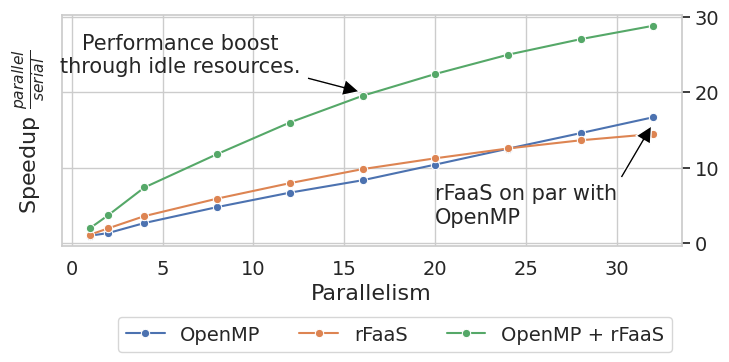

In [3]:
import pandas as pd


import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import math

#sns.set(rc={'figure.figsize':(8,4)})
sns.set(rc={'figure.figsize':(8,3)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

def bandwidth_function(x, p):
    # mebibytes/s
    #bw = 11464.333008
    bw = 11686.41
    # 2 - round-trip
    # x - number of workers
    # size - basic msg size
    return p*(size*size*24)/ (bw * 1024 * 1024) * 1000
xrange = list(range(200, 800))#[200,2,4,8,12,16,20,24,28,32,64]

omp  = data.loc[(data['type'] == 'omp')].groupby(['worker']).mean()
elastic  = data.loc[(data['type'] == 'rfaas_100') ].groupby(['worker']).mean()
#print(omp)
#print(elastic)
x = omp
x['time'] = SERIAL / x['time']
#x = (omp['time']/SERIAL)#.reset_index()
#x.set_index('worker', 
#print(x)
elastic2  = data.loc[(data['type'] == 'rfaas_50') ].groupby(['worker']).mean()
x2 = elastic
x2['time']=  SERIAL /x2['time']#.reset_index()
#print(x2)
x3 = elastic2
x3['time'] = SERIAL / x3['time'] 
print(elastic)
print(omp)

#print('omp/rfaas')
print(omp/elastic)
print(elastic2/omp)



fig, ax = plt.subplots()
#print(x['time'])


sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='d',
             #estimator=p50_estimator,
             color=sns.color_palette()[0],
             palette=sns.color_palette()[0],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='s',
             #estimator=p50_estimator,
             color=sns.color_palette()[1],
             palette=sns.color_palette()[1],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x3['time'],
             ci=95, marker="o",
             #estimator=p50_estimator,
             color=sns.color_palette()[2],
             palette=sns.color_palette()[2],
             label='r',
             #data=x2,
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)


ax.annotate('rFaaS on par with\nOpenMP', xy=(32, 16), xytext=(20,5),fontsize=15,#fontweight='bold',
ha="left", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
ax.annotate('Performance boost\nthrough idle resources.', xytext=(6,25), xy=(16, 20),fontsize=15,#fontweight='bold',
ha="center", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)

ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.set_xticks([1, 4, 8, 12, 16, 20,24,28,32])
ax.set_xlabel('Parallelism',fontsize=16)
ax.set_ylabel(r'Speedup $\frac{parallel}{serial}$',fontsize=16,labelpad=10)
#ax[0].yaxis.set_label_position("right")
#ax.set_ylabel('Speedup',fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
#ax[1].set_yscale('log')
#ax[0].set_xlim([])
#ax[1].set_xlim([400, 800])
#ax[1].yaxis.set_label_position("right")
ax.yaxis.tick_right()
#ax[0].set_ylim([1, 2.4])
#ax2.set_ylim([0,1200])

handles, labels = ax.get_legend_handles_labels()
print(handles, labels)
#print(handles,labels)
ax.legend(handles[0:3], ['OpenMP', 'rFaaS', 'OpenMP + rFaaS'],ncol=3, bbox_to_anchor=(1.0, -0.5),# ncol=3, 
             loc='lower right', fontsize=14)
#ax[0].legend().set_visible(False)
fig.savefig(os.path.join("plots", "faas", "blackscholes_speedup.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)
plt.show()

### New plot design

Major change - now we plot OpenMP + rFaaS with twice as many resources.

In [5]:
import pandas as pd
import os

workers = [1,2,4,8,12,16,20,24,28,32]
data_path = os.path.join(os.path.pardir, 'data')

dfs = []
for worker in workers:
    d = []
    data = pd.read_csv(os.path.join(data_path, 'baseline', 'daint_mc', 'faas_applications', 'blackscholes', f'blackscholes_omp_{worker}'))
    data['worker'] = worker
    data = data.iloc[1:] 
    dfs.append(data)
df = pd.concat(dfs, axis=0)
df['type'] = 'omp'


dfs = []
for worker in workers:
    d = []
    data = pd.read_csv(os.path.join(data_path, 'faas_applications', 'blackscholes', 'rfaas_100', f'rfaas_{worker}'))
    data['worker'] = worker
    dfs.append(data)
df_f = pd.concat(dfs, axis=0)
df_f['type'] = 'rfaas_100'

dfs = []
for worker in workers:
    d = []
    data = pd.read_csv(os.path.join(data_path,  'faas_applications', 'blackscholes', 'rfaas_50', f'rfaas_{worker}'))
    data['worker'] = worker * 2
    dfs.append(data)
df_f2 = pd.concat(dfs, axis=0)
df_f2['type'] = 'rfaas_50'

data = pd.concat([df, df_f, df_f2])
data['time'] = data['repetition']
# convert to seconds
data['time'] /= 1000.0

print(df.groupby(['worker']).mean())
print(df_f.groupby(['worker']).mean())
print(df_f2.groupby(['worker']).mean())

SERIAL = 726245 / 1000.0

data.reset_index(inplace=True)

#data_serial = pd.read_csv(os.path.join(data_path, 'blackscholes_serial.csv'))
#SERIAL = data_serial['repetition'].median()
#SERIAL /= 1000.0
print("Serial Black-Scholes execution", SERIAL)

           repetition
worker               
1       726245.050505
2       539037.737374
4       270771.131313
8       151396.848485
12      108202.929293
16       86912.671717
20       69607.643434
24       57900.222222
28       49706.798990
32       43430.673737
        repetition
worker            
1       644090.260
2       368693.980
4       201736.940
8       122702.210
12       91101.122
16       73847.220
20       64443.657
24       57762.819
28       53172.090
32       50094.359
        repetition
worker            
2       365993.280
4       196393.210
8        98162.506
16       61425.621
24       45342.368
32       37133.364
40       32346.284
48       29037.007
56       26822.515
64       25169.690
Serial Black-Scholes execution 726.245


        index  repetition       time
worker                              
1        49.5  644090.260   1.127552
2        49.5  368693.980   1.969777
4        49.5  201736.940   3.599960
8        49.5  122702.210   5.918761
12       49.5   91101.122   7.971856
16       49.5   73847.220   9.834426
20       49.5   64443.657  11.269457
24       49.5   57762.819  12.572880
28       49.5   53172.090  13.658387
32       49.5   50094.359  14.497541
        index     repetition       time
worker                                 
1        50.0  726245.050505   1.000000
2        50.0  539037.737374   1.347299
4        50.0  270771.131313   2.682136
8        50.0  151396.848485   4.796962
12       50.0  108202.929293   6.711879
16       50.0   86912.671717   8.356031
20       50.0   69607.643434  10.433409
24       50.0   57900.222222  12.543043
28       50.0   49706.798990  14.610577
32       50.0   43430.673737  16.721937
           index  repetition      time
worker                               

/tmp/ipykernel_844818/4226462786.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/4226462786.py:62: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/4226462786.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/4226462786.py:70: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/4226462786.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x3['time'],
/tmp/ipykernel_844818/4226462786.py:78: UserWarning: Ignoring `palette`

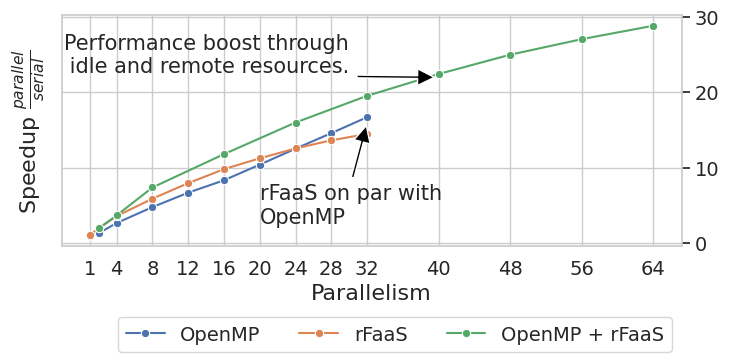

In [6]:
import pandas as pd


import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import math

#sns.set(rc={'figure.figsize':(8,4)})
sns.set(rc={'figure.figsize':(8,3)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

def bandwidth_function(x, p):
    # mebibytes/s
    #bw = 11464.333008
    bw = 11686.41
    # 2 - round-trip
    # x - number of workers
    # size - basic msg size
    return p*(size*size*24)/ (bw * 1024 * 1024) * 1000
xrange = list(range(200, 800))#[200,2,4,8,12,16,20,24,28,32,64]

omp  = data.loc[(data['type'] == 'omp')].groupby(['worker']).mean()
elastic  = data.loc[(data['type'] == 'rfaas_100') ].groupby(['worker']).mean()
#print(omp)
#print(elastic)
x = omp
x['time'] = SERIAL / x['time']
#x = (omp['time']/SERIAL)#.reset_index()
#x.set_index('worker', 
#print(x)
elastic2  = data.loc[(data['type'] == 'rfaas_50') ].groupby(['worker']).mean()
x2 = elastic
x2['time']=  SERIAL /x2['time']#.reset_index()
#print(x2)
x3 = elastic2
x3['time'] = SERIAL / x3['time'] 
print(elastic)
print(omp)

#print('omp/rfaas')
print(omp/elastic)
print(elastic2/omp)



fig, ax = plt.subplots()
#print(x['time'])


sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='d',
             #estimator=p50_estimator,
             color=sns.color_palette()[0],
             palette=sns.color_palette()[0],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='s',
             #estimator=p50_estimator,
             color=sns.color_palette()[1],
             palette=sns.color_palette()[1],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x3['time'],
             ci=95, marker="o",
             #estimator=p50_estimator,
             color=sns.color_palette()[2],
             palette=sns.color_palette()[2],
             label='r',
             #data=x2,
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)


ax.annotate('rFaaS on par with\nOpenMP', xy=(32, 16), xytext=(20,5),fontsize=15,#fontweight='bold',
ha="left", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
ax.annotate('Performance boost through\n idle and remote resources.', xytext=(14,25), xy=(40, 22),fontsize=15,#fontweight='bold',
ha="center", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)

ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xticks([1, 4, 8, 12, 16, 20, 24, 28, 32, 40, 48, 56, 64])
ax.set_xlabel('Parallelism',fontsize=16)
ax.set_ylabel(r'Speedup $\frac{parallel}{serial}$',fontsize=16,labelpad=10)
#ax[0].yaxis.set_label_position("right")
#ax.set_ylabel('Speedup',fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
#ax[1].set_yscale('log')
#ax[0].set_xlim([])
#ax[1].set_xlim([400, 800])
#ax[1].yaxis.set_label_position("right")
ax.yaxis.tick_right()
#ax[0].set_ylim([1, 2.4])
#ax2.set_ylim([0,1200])

handles, labels = ax.get_legend_handles_labels()
print(handles, labels)
#print(handles,labels)
ax.legend(handles[0:3], ['OpenMP', 'rFaaS', 'OpenMP + rFaaS'],ncol=3, bbox_to_anchor=(1.0, -0.5),# ncol=3, 
             loc='lower right', fontsize=14)
#ax[0].legend().set_visible(False)
fig.savefig(os.path.join("plots", "faas", "blackscholes_speedup_new.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)
plt.show()

        index  repetition       time
worker                              
1        49.5  644090.260   1.127552
2        49.5  368693.980   1.969777
4        49.5  201736.940   3.599960
8        49.5  122702.210   5.918761
12       49.5   91101.122   7.971856
16       49.5   73847.220   9.834426
20       49.5   64443.657  11.269457
24       49.5   57762.819  12.572880
28       49.5   53172.090  13.658387
32       49.5   50094.359  14.497541
        index     repetition       time
worker                                 
1        50.0  726245.050505   1.000000
2        50.0  539037.737374   1.347299
4        50.0  270771.131313   2.682136
8        50.0  151396.848485   4.796962
12       50.0  108202.929293   6.711879
16       50.0   86912.671717   8.356031
20       50.0   69607.643434  10.433409
24       50.0   57900.222222  12.543043
28       50.0   49706.798990  14.610577
32       50.0   43430.673737  16.721937
           index  repetition      time
worker                               

/tmp/ipykernel_844818/3522449745.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/3522449745.py:66: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/3522449745.py:74: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/3522449745.py:74: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
/tmp/ipykernel_844818/3522449745.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=x3['time'],
/tmp/ipykernel_844818/3522449745.py:82: UserWarning: Ignoring `palette`

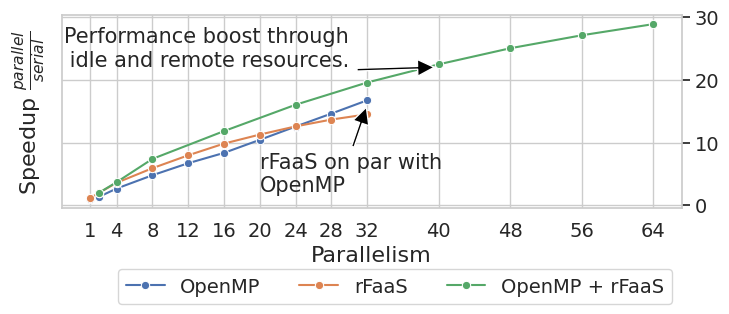

In [7]:
import pandas as pd


import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import math

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#sns.set(rc={'figure.figsize':(8,4)})
sns.set(rc={'figure.figsize':(8,2.5)})
sns.set_style("whitegrid")

def p50_estimator(x):
    return np.percentile(x, 50)
def p95_estimator(x):
    return np.percentile(x, 95)
def p99_estimator(x):
    return np.percentile(x, 99)

def bandwidth_function(x, p):
    # mebibytes/s
    #bw = 11464.333008
    bw = 11686.41
    # 2 - round-trip
    # x - number of workers
    # size - basic msg size
    return p*(size*size*24)/ (bw * 1024 * 1024) * 1000
xrange = list(range(200, 800))#[200,2,4,8,12,16,20,24,28,32,64]

omp  = data.loc[(data['type'] == 'omp')].groupby(['worker']).mean()
elastic  = data.loc[(data['type'] == 'rfaas_100') ].groupby(['worker']).mean()
#print(omp)
#print(elastic)
x = omp
x['time'] = SERIAL / x['time']
#x = (omp['time']/SERIAL)#.reset_index()
#x.set_index('worker', 
#print(x)
elastic2  = data.loc[(data['type'] == 'rfaas_50') ].groupby(['worker']).mean()
x2 = elastic
x2['time']=  SERIAL /x2['time']#.reset_index()
#print(x2)
x3 = elastic2
x3['time'] = SERIAL / x3['time'] 
print(elastic)
print(omp)

#print('omp/rfaas')
print(omp/elastic)
print(elastic2/omp)



fig, ax = plt.subplots()
#print(x['time'])


sns.lineplot(data=x['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='d',
             #estimator=p50_estimator,
             color=sns.color_palette()[0],
             palette=sns.color_palette()[0],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x2['time'],#x="worker", y="time", data=x,
             ci=95, marker="o",
             label='s',
             #estimator=p50_estimator,
             color=sns.color_palette()[1],
             palette=sns.color_palette()[1],
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)
sns.lineplot(data=x3['time'],
             ci=95, marker="o",
             #estimator=p50_estimator,
             color=sns.color_palette()[2],
             palette=sns.color_palette()[2],
             label='r',
             #data=x2,
             #data=x.loc[(x['workers']  == 32) | (x['workers']  == 16) | (x['workers']  == 64)],
             ax=ax)


ax.annotate('rFaaS on par with\nOpenMP', xy=(32, 16), xytext=(20,5),fontsize=15,#fontweight='bold',
ha="left", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)
ax.annotate('Performance boost through\n idle and remote resources.', xytext=(14,25), xy=(40, 22),fontsize=15,#fontweight='bold',
ha="center", va="center",
arrowprops=dict(facecolor='black', shrink=0.05, width=2),
)

ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xticks([1, 4, 8, 12, 16, 20, 24, 28, 32, 40, 48, 56, 64])
ax.set_xlabel('Parallelism',fontsize=16)
ax.set_ylabel(r'Speedup $\frac{parallel}{serial}$',fontsize=16,labelpad=10)
#ax[0].yaxis.set_label_position("right")
#ax.set_ylabel('Speedup',fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
#ax[1].set_yscale('log')
#ax[0].set_xlim([])
#ax[1].set_xlim([400, 800])
#ax[1].yaxis.set_label_position("right")
ax.yaxis.tick_right()
#ax[0].set_ylim([1, 2.4])
#ax2.set_ylim([0,1200])

handles, labels = ax.get_legend_handles_labels()
print(handles, labels)
#print(handles,labels)
ax.legend(handles[0:3], ['OpenMP', 'rFaaS', 'OpenMP + rFaaS'],ncol=3, bbox_to_anchor=(1.0, -0.55),# ncol=3, 
             loc='lower right', fontsize=14)
#ax[0].legend().set_visible(False)
fig.savefig(os.path.join('plots', "faas", "blackscholes_speedup_new_small.pdf"),bbox_inches='tight',pad_inches = 0, transparent=False)
plt.show()